# **Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **Import Library**

In [533]:
#Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **Memuat Dataset**

In [534]:
#Memuat dataaset menggunakan pandas
income = pd.read_csv('adult_income.csv')
income

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [535]:
# Menghapus kolom yang tidak digunakan 
income.columns = income.columns.str.strip()
df = income.drop(columns=['Unnamed: 0','fnlwgt','capital-gain', 'capital-loss'])
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States


# **Exploratory Data Analysis (EDA)**

### Struktur Data yang diamati

In [536]:
# Memahami Struktur Data yang digunakan 
# Meninjau jumlah baris, kolom tipe data dan jenis data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   hours-per-week   48842 non-null  int64 
 10  native-country   48842 non-null  object
dtypes: int64(3), object(8)
memory usage: 4.1+ MB


In [537]:
numeric_features = df.select_dtypes(include=['number']).columns

In [538]:
categorical_features = df.select_dtypes(include=['object']).columns

Dataset ini terdiri dari 11 kolom dengan 48842 baris. Setiap kolom pada dataset ini memiliki nilai non-null sehingga sudah baik untuk ditangani lebih lanjut. Untuk tipe data sudah ada data dengan tipe numerikal (int64) dan tipe kategorikal (object)

### Menangani Data yang Hilang

In [539]:
df.nunique()

age                74
workclass           9
education          16
educational-num    16
marital-status      7
occupation         15
relationship        6
race                5
gender              2
hours-per-week     96
native-country     42
dtype: int64

In [540]:
# Melakukan pemeriksaan jumlah data yang hilang di setiap kolom
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [541]:
# Memeriksa data duplicate 
df['isDuplicate'] = df.duplicated()
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,isDuplicate
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,False
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,False
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,False
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,False
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,False
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,True
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,False
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,True


Dikarenakan dari hasil peninjauan tidak ditemukan data yang hilang tetapi sepertinya terdapat data dengan nilai ? sehingga perlu untuk ditangani lebih lanjut.

### Analisis Distribusi dan Korelasi Variabel Numerik

In [542]:
# Menampilkan statistik deskriptif dari dataset 
df[numeric_features].describe()

,age,educational-num,hours-per-week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382
std,13.710510,2.570973,12.391444
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


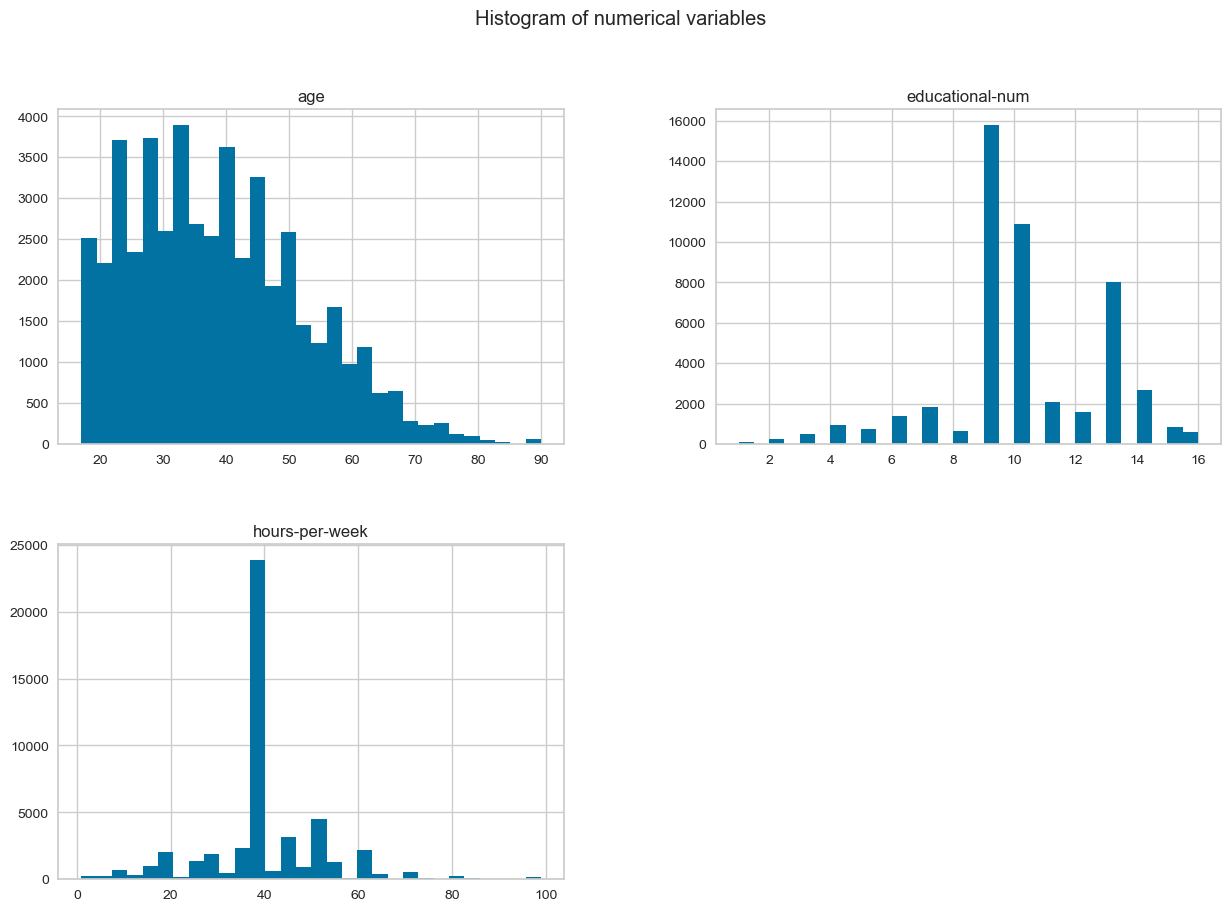

In [543]:
# Menampilkan histogram untuk distribusi frekuensi
df.hist(bins=30, figsize=(15,10))
plt.suptitle('Histogram of numerical variables')
plt.show()

In [544]:
# Memeriksa hubungan variabel dengan menggunakan matriks korelasi
correlation_matrix = df[numeric_features].corr()
print(f'Correlation Matrix : {correlation_matrix}')

Correlation Matrix :                       age  educational-num  hours-per-week
age              1.000000         0.030940        0.071558
educational-num  0.030940         1.000000        0.143689
hours-per-week   0.071558         0.143689        1.000000


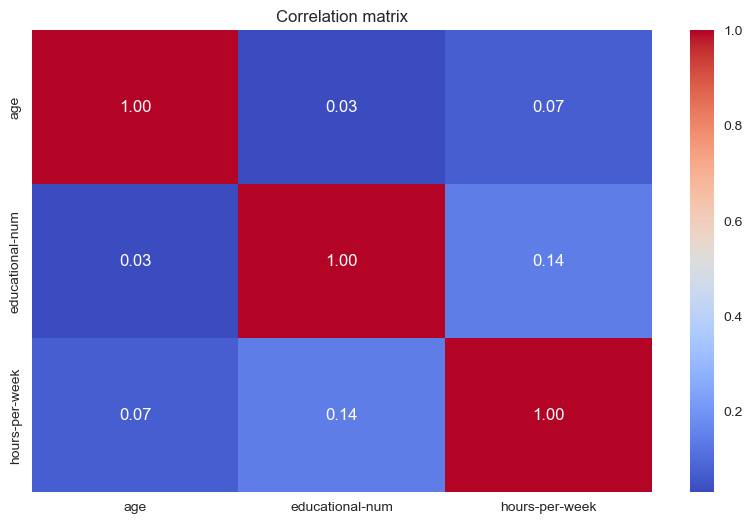

In [545]:
# Visualisasi matriks korelasi menggunakan heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

### Visualisasi Data variabel Kategorikal

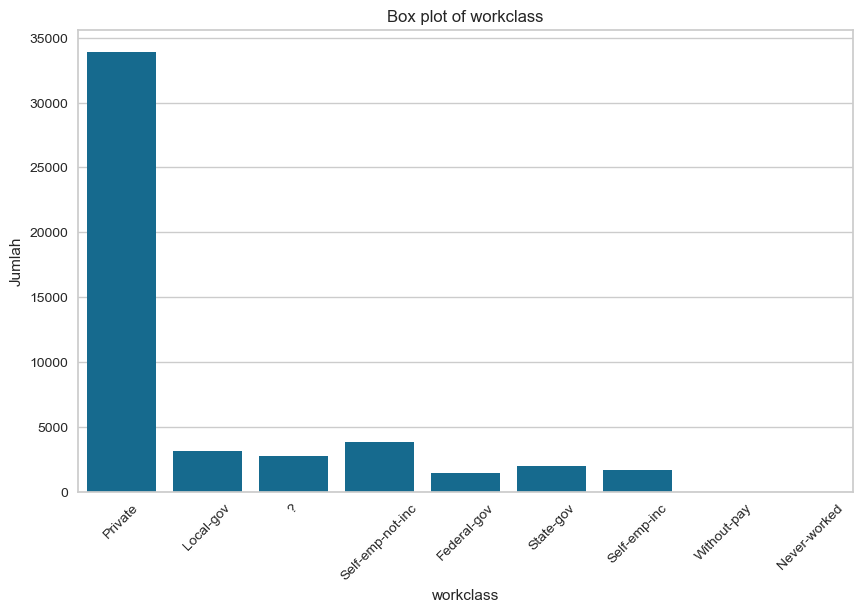

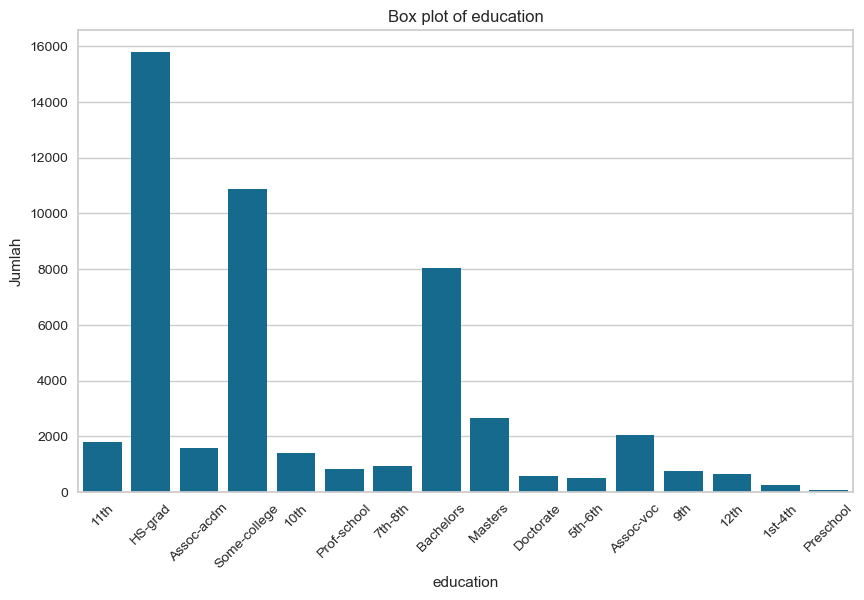

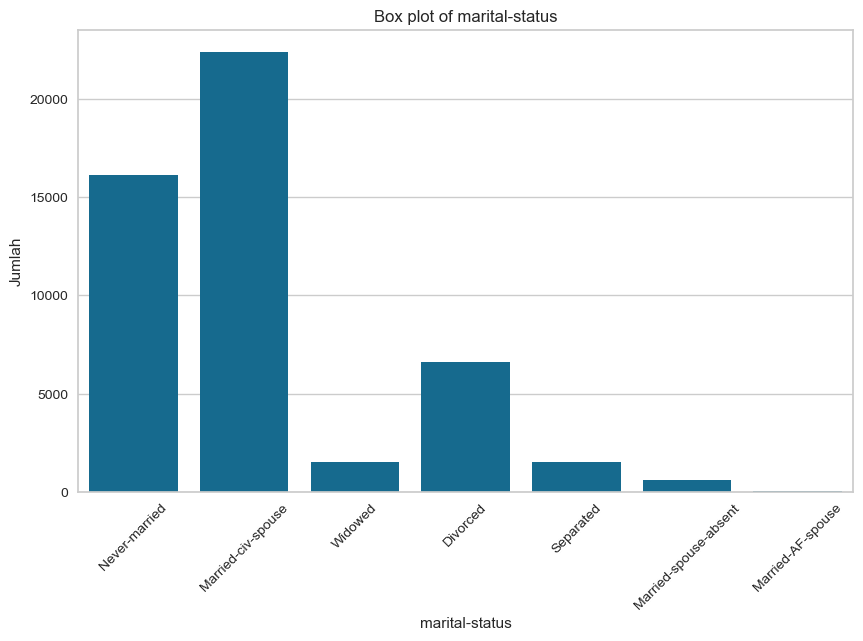

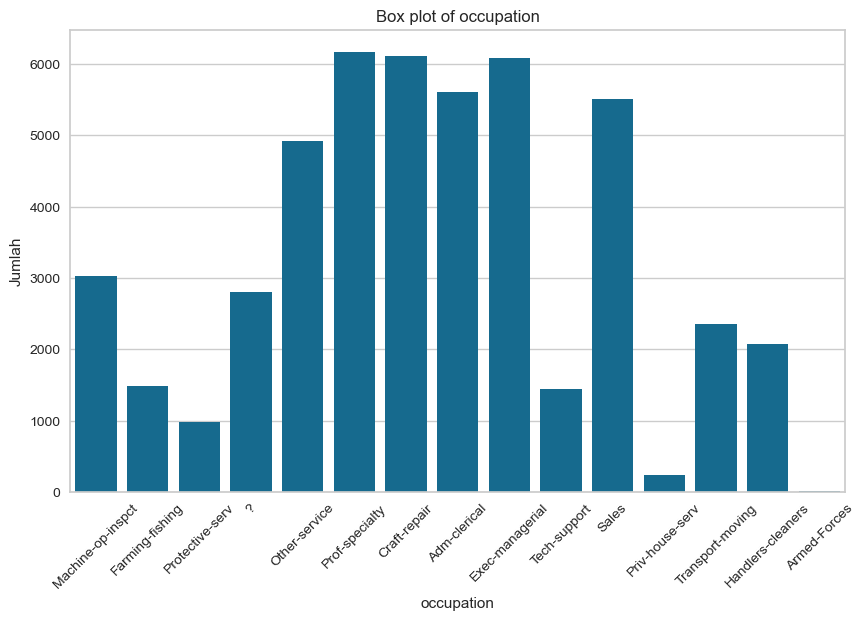

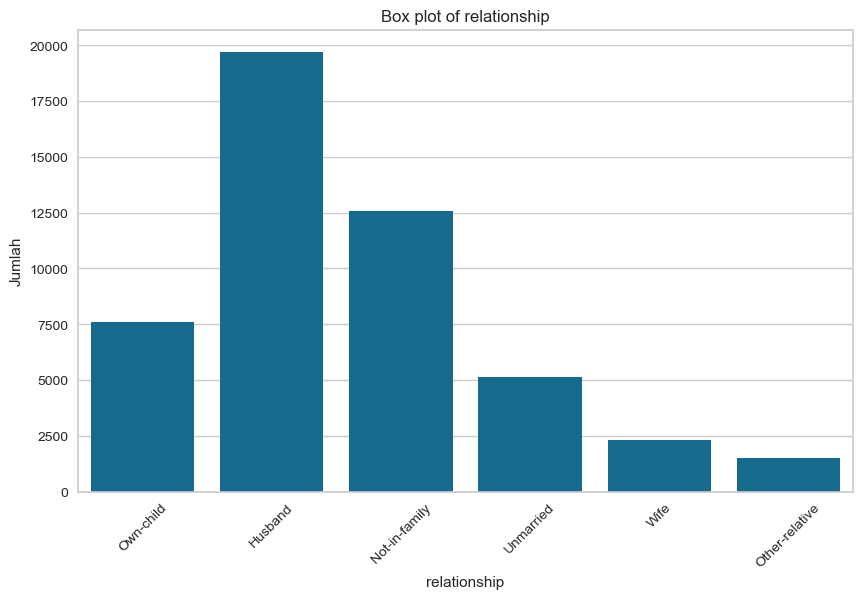

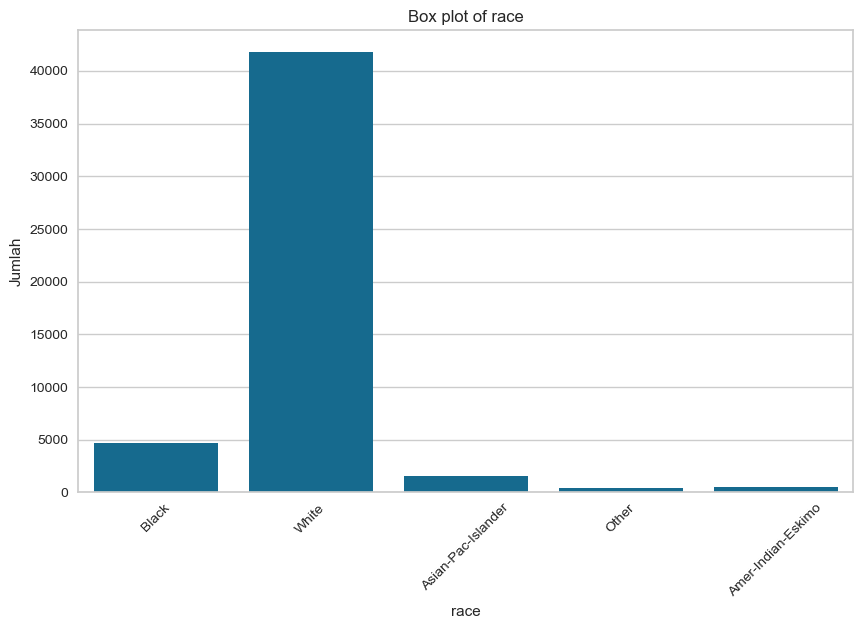

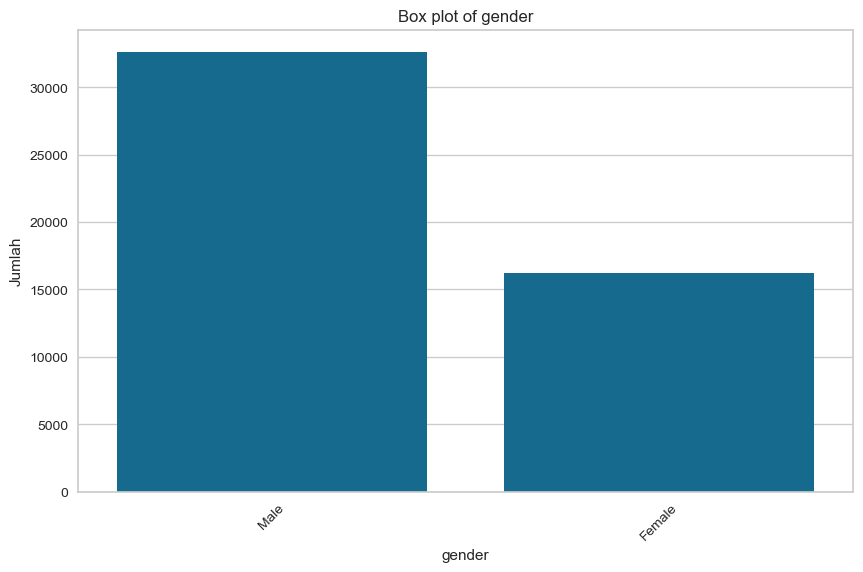

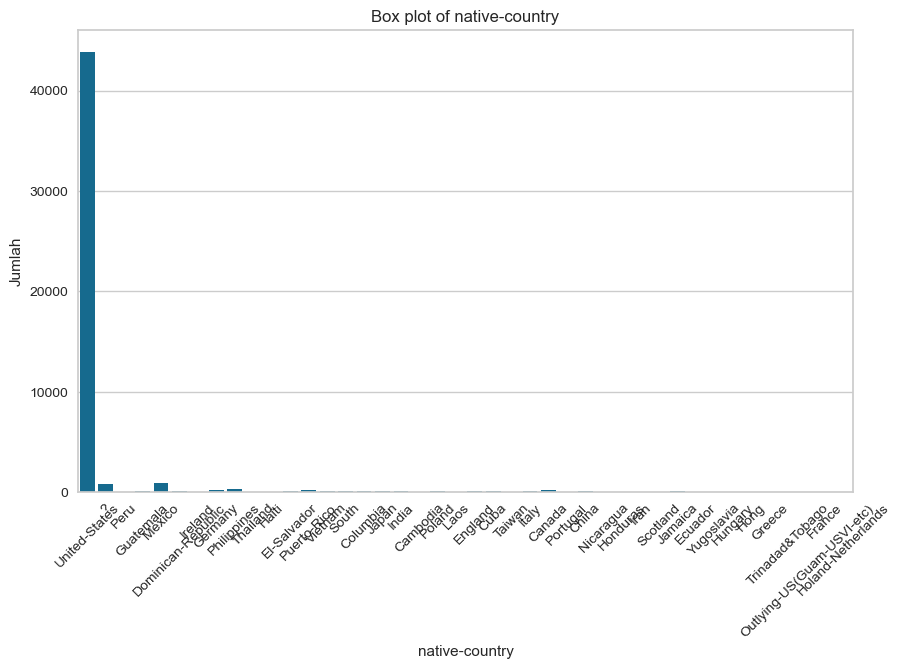

In [546]:
# Bar plot untuk data kategorikal 
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

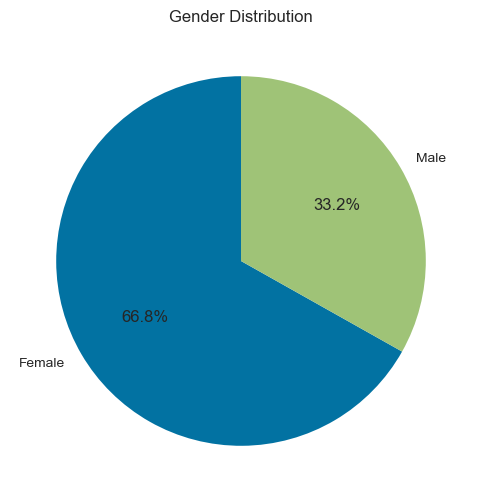

In [547]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi 
plt.figure(figsize=(10, 6))
plt.pie(df['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

Hasil menunjukkan berbagai hasil analisis distribusi frekuensi sesuai dengan hasil yang ada. Temuan lainnya ialah korelasi antara setiap variabel yang mana dapat di lihat pada matrix korelasi yang dapat disimpulkan bahwa hubungan antar setiap variabel memiliki nilai yang lemah hingga sangat lemah sekitar <= 0.1, selain itu dilakukan juga visualisasi untuk data kategorikal.

# **Data Preprocessing**

### Menangani Missing Values

In [548]:
# Menangani data dengan nilai ? (Missing Values)
import numpy as np

# Mengganti semua data dengan nilai ? menjadi NaN
df.replace('?', np.nan, inplace=True)

# Mengganti missing values pada kolom kategorikal dengan modus
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,isDuplicate
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,False
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,False
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,False
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,False
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,False
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,True
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,False
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,True


### Deteksi dan Menangani Outlier

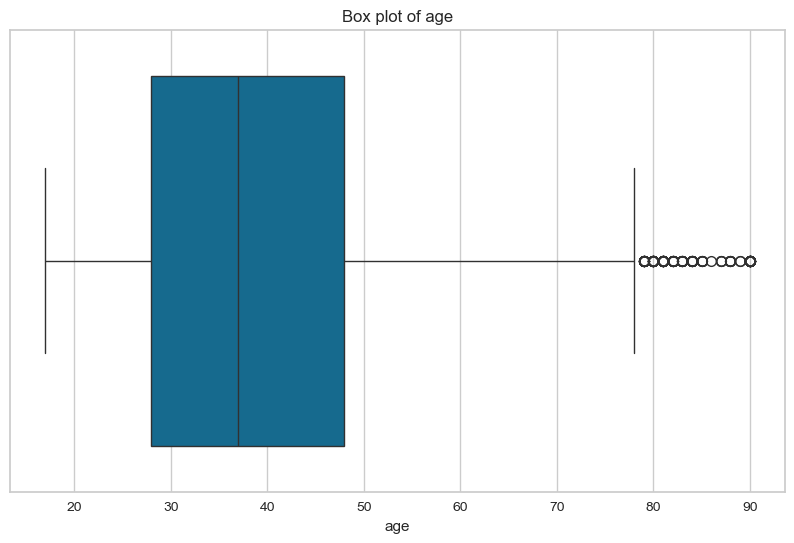

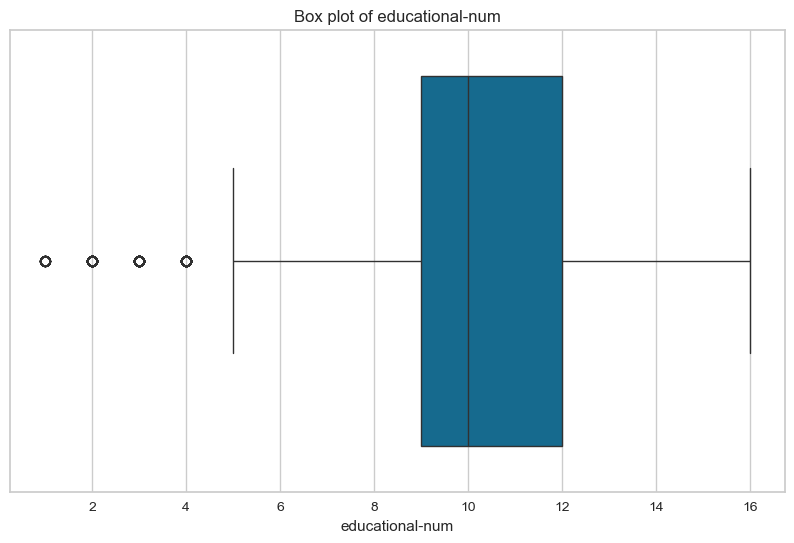

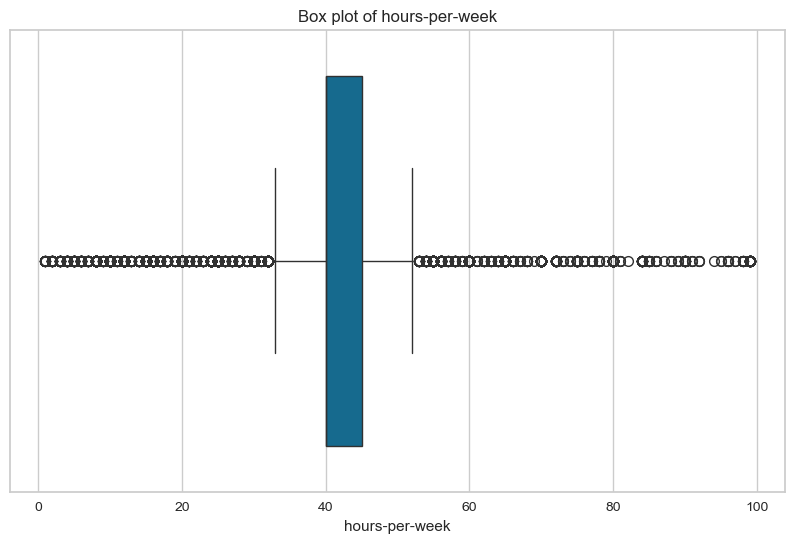

In [549]:
# Memeriksa Outlier menggunakan Box Plot
for feature in numeric_features: 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [550]:
# Menangani data outlier
# Identifikasi outliers menggunakan IQR 
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)

IQR = Q3 - Q1 

In [551]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | 
              (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

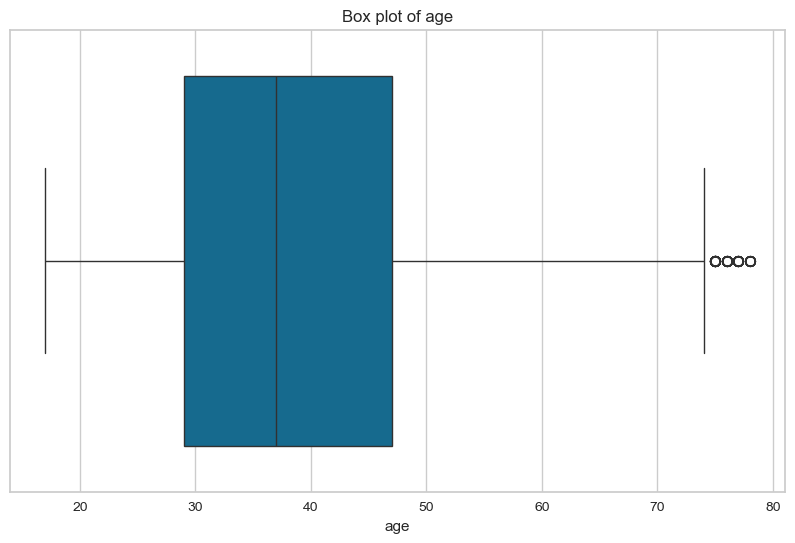

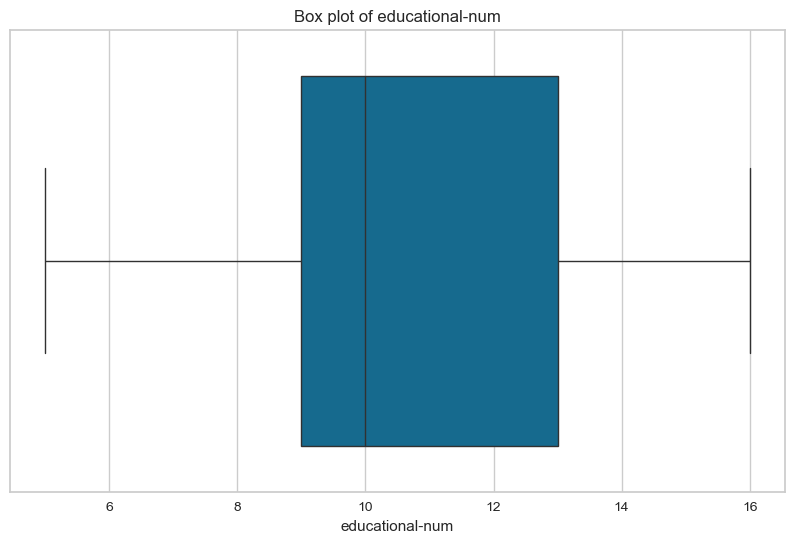

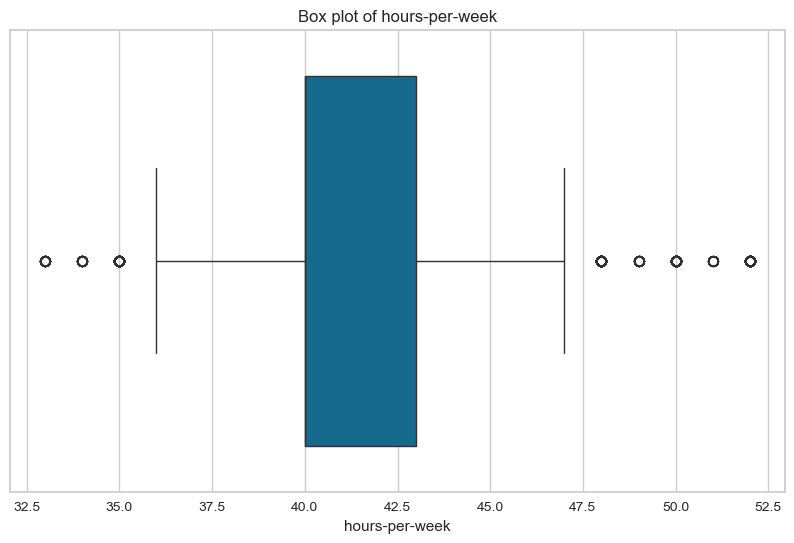

In [552]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [554]:
# Menangani outlier pada kolom age dengan mengganti outlier dengan nilai median
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Mengganti outlier dengan median pada kolom 'age'
median_age = df['age'].median()
df['age'] = df['age'].apply(
    lambda x: median_age if x < (Q1_age - 1.5 * IQR_age) or x > (Q3_age + 1.5 * IQR_age) else x
)

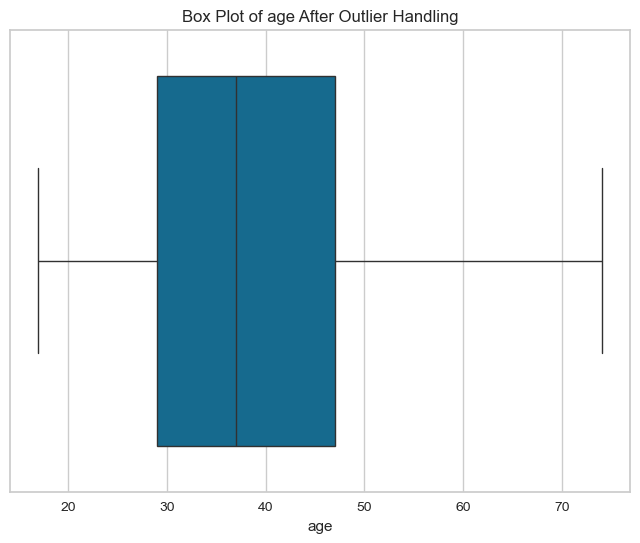

In [555]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of age After Outlier Handling')
plt.show()

In [556]:
# Mengganti nilai outlier pada hours-per-week dengan menggunakan nilai batas terdekat
Q1_hours = df['hours-per-week'].quantile(0.25)
Q3_hours = df['hours-per-week'].quantile(0.75)
IQR_hours = Q3_hours - Q1_hours

lower_bound = Q1_hours - 1.5 * IQR_hours
upper_bound = Q3_hours + 1.5 * IQR_hours

df['hours-per-week'] = df['hours-per-week'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)

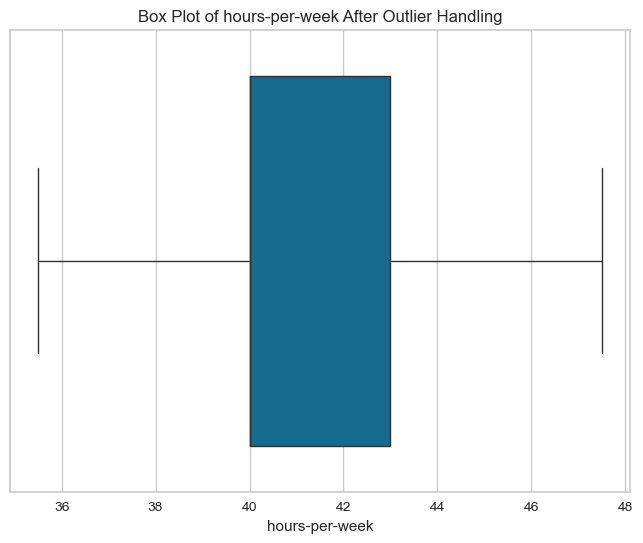

In [557]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['hours-per-week'])
plt.title('Box Plot of hours-per-week After Outlier Handling')
plt.show()

### Encoding Data Kategorikal

In [532]:
# Melakukan encoding data kategorikal
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Menggunakan OneHotEncoder
df_one_hot = encoder.fit_transform(df[categorical_features])

# Masukkan ke dalam dataframe lalu gabungkan dengan data sebenarnya
df_encoded = pd.DataFrame(df_one_hot, columns=encoder.get_feature_names_out(categorical_features))
df = pd.concat([df.drop(columns=categorical_features), df_encoded], axis=1)

df

KeyError: "None of [Index(['workclass', 'education', 'marital-status', 'occupation',\n       'relationship', 'race', 'gender', 'native-country'],\n      dtype='object')] are in the [columns]"

### Binning Data

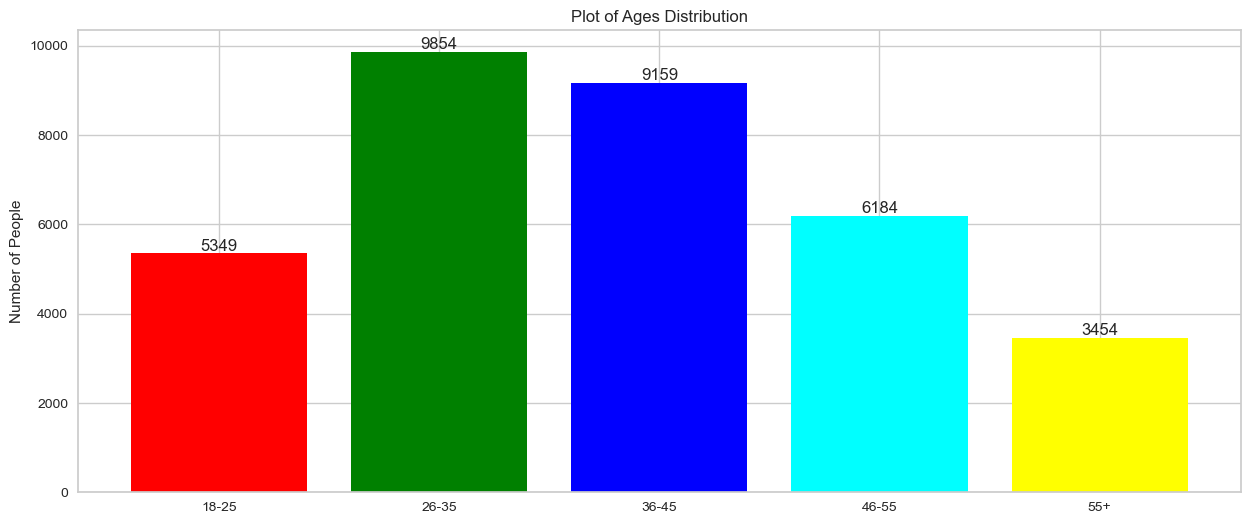

In [559]:
# Melakukan Binning (Pengelompokan Data) usia menjadi beberapa kategori
age17_25 = df.age[(df.age >= 17) & (df.age <= 25)]
age26_35 = df.age[(df.age >= 26) & (df.age <= 35)]
age36_45 = df.age[(df.age >= 36) & (df.age <= 45)]
age46_55 = df.age[(df.age >= 46) & (df.age <= 55)]
age55above = df.age[df.age >= 56]

# Menyusun data untuk plotting
x = ['18-25', '26-35', '36-45', '46-55', '55+']
y = [len(age17_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia 
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Plot of Ages Distribution')
plt.ylabel('Number of People')

# Menambahkan label jumlah
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

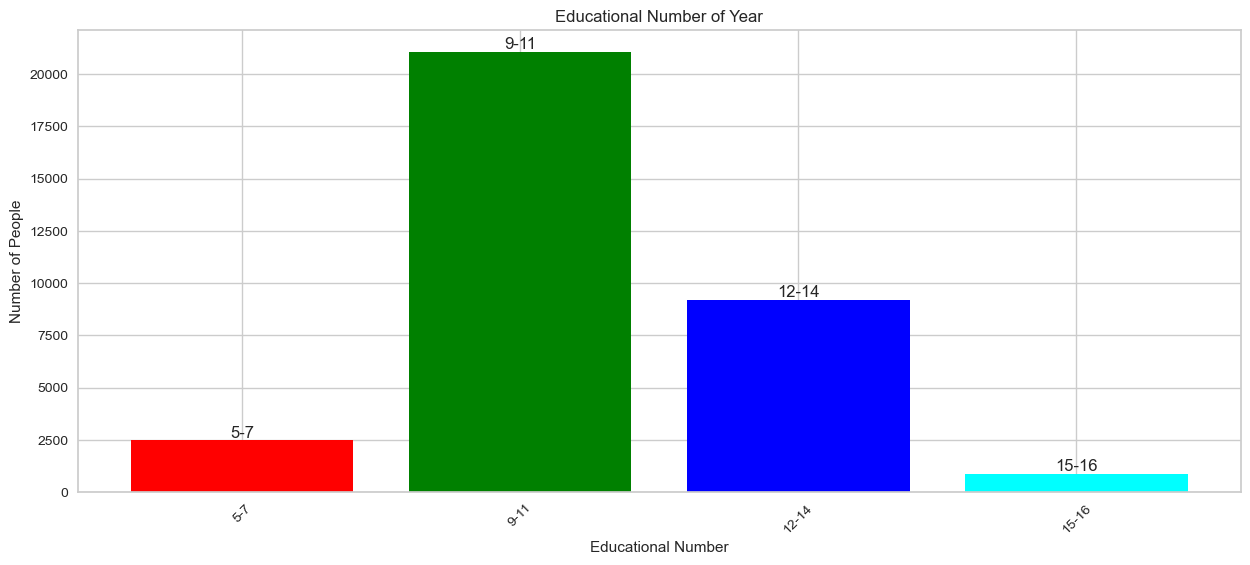

In [561]:
# Binning untuk educational-num 
Edu5_7 = df['educational-num'][(df['educational-num'] >= 5) & (df['educational-num'] <= 7)]
Edu9_11 = df['educational-num'][(df['educational-num'] >= 9) & (df['educational-num'] <= 11)]
Edu12_14 = df['educational-num'][(df['educational-num'] >= 12) & (df['educational-num'] <= 14)]
Edu15_16 = df['educational-num'][(df['educational-num'] >= 15) & (df['educational-num'] <= 16)]

ex = ['5-7', '9-11', '12-14', '15-16']
ey = [len(Edu5_7.values), len(Edu9_11.values), len(Edu12_14.values), len(Edu15_16.values)]

# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(ex, ey, color=['red', 'green', 'blue', 'cyan'])
plt.title('Educational Number of Year') 
plt.xlabel('Educational Number') 
plt.ylabel('Number of People')
plt.xticks(rotation=45)

# Menambahkan label jumlah
for i in range(len(ex)):
    plt.text(i, ey[i], ex[i], ha='center', va='bottom')

plt.show()

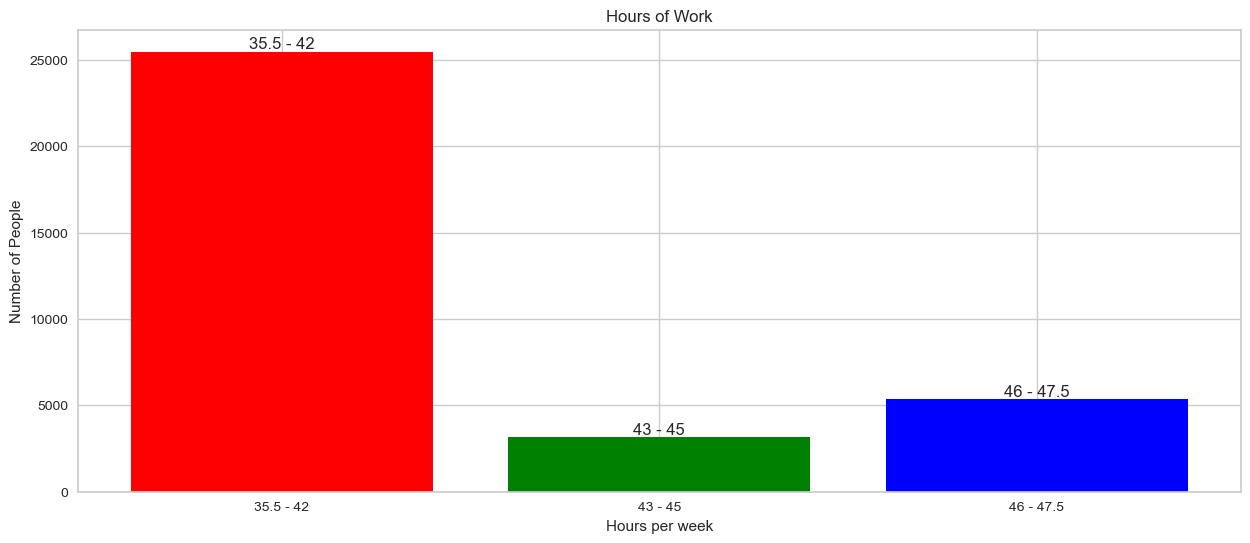

In [563]:
# Binning untuk hours of work 
hr35_42 = df['hours-per-week'][(df['hours-per-week'] >= 35.5) & (df['hours-per-week'] <= 42)]
hr43_45 = df['hours-per-week'][(df['hours-per-week'] >= 43) & (df['hours-per-week'] <= 45)]
hr46_47 = df['hours-per-week'][(df['hours-per-week'] >= 46) & (df['hours-per-week'] <= 47.5)]

hrx = ['35.5 - 42', '43 - 45', '46 - 47.5']
hry = [len(hr35_42.values), len(hr43_45.values), len(hr46_47.values)]

# Membuat bar chart 
plt.figure(figsize=(15, 6))
plt.bar(hrx, hry, color=['red', 'green', 'blue'])
plt.title('Hours of Work')
plt.xlabel('Hours per week')
plt.ylabel('Number of People')


# Menambahkan label jumlah
for i in range(len(hrx)):
    plt.text(i, hry[i], hrx[i], ha='center', va='bottom')

plt.show()

In [529]:
# # Standardisasi 
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[numeric_features] = scaler.fit_transform(df[numeric_features])

# numeric_features_income = income.select_dtypes(include=['number']).columns

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# sns.histplot(income[numeric_features_income[3]], kde=True)
# plt.title('Histogram Sebelum Standardisasi')

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 2)
# sns.histplot(df[numeric_features[1]], kde=True)
# plt.title('Histogram Setelah Standardisasi')

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34000 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              34000 non-null  float64
 1   educational-num  34000 non-null  int64  
 2   hours-per-week   34000 non-null  float64
 3   workclass        34000 non-null  object 
 4   education        34000 non-null  object 
 5   marital-status   34000 non-null  object 
 6   occupation       34000 non-null  object 
 7   relationship     34000 non-null  object 
 8   race             34000 non-null  object 
 9   gender           34000 non-null  object 
 10  native-country   34000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.1+ MB


In [566]:
# Memilih Fitur yang sesuai untuk Clustering 
X = df.iloc[:, [1, 2]].values

# Menampilkan data yang diambil dalam format DataFrame nama kolom yang sesuai
print(pd.DataFrame(X, columns=['educational-num (year)', 'hours-per-week']))

       educational-num (year)  hours-per-week
0                         7.0            40.0
1                         9.0            47.5
2                        12.0            40.0
3                        10.0            40.0
4                         9.0            40.0
...                       ...             ...
33995                    10.0            40.0
33996                    12.0            38.0
33997                     9.0            40.0
33998                     9.0            40.0
33999                     9.0            40.0

[34000 rows x 2 columns]


C:\Users\ACER\miniconda3\envs\latihan\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\miniconda3\envs\latihan\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\miniconda3\envs\latihan\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\miniconda3\envs\latihan\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

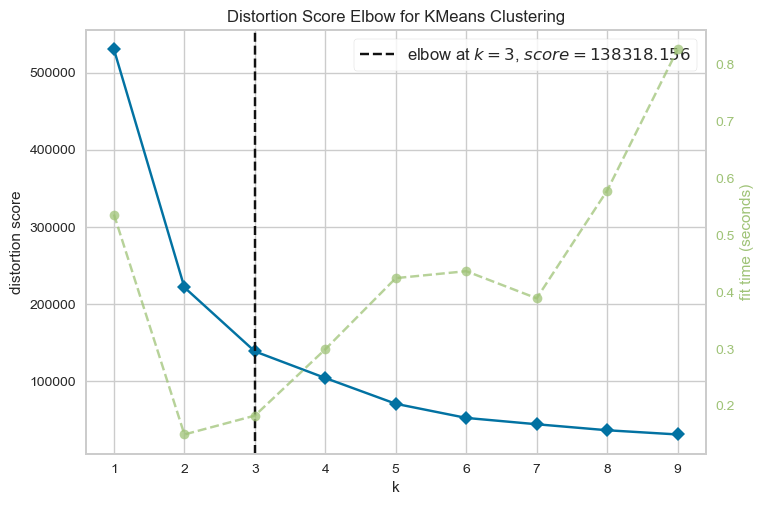

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [567]:
# Menentukan jumlah cluster dengan menggunakan Elbow Method
# Inisialisasi model KMeans 
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menentukan jumlah cluster yang optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis 
visualizer.show()

In [573]:
# Membangun model Cluster dengan menggunakan KMeans 
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print('Analisis data untuk setiap Cluster:')
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini 
        cluster_data = X[labels == cluster_id]
        
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_edu = cluster_data[:, 0].mean()
        mean_hours = cluster_data[:, 1].mean()
        
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Educational (year): {mean_edu:.2f}")
        print(f"Rata-rata Hours of Work (week): {mean_hours:.2f}")

# Analisis karakteristik setiap cluster 
analyze_clusters(X, labels, k) 

Analisis data untuk setiap Cluster:

Cluster 1:
Rata-rata Educational (year): 9.11
Rata-rata Hours of Work (week): 39.58

Cluster 2:
Rata-rata Educational (year): 13.39
Rata-rata Hours of Work (week): 46.58

Cluster 3:
Rata-rata Educational (year): 9.25
Rata-rata Hours of Work (week): 46.52


C:\Users\ACER\miniconda3\envs\latihan\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## **Evaluasi Model Clustering**

In [571]:
# Menggunakan Silhoutte Score untuk menghitung nilai Cluster 
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5882926112291093


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

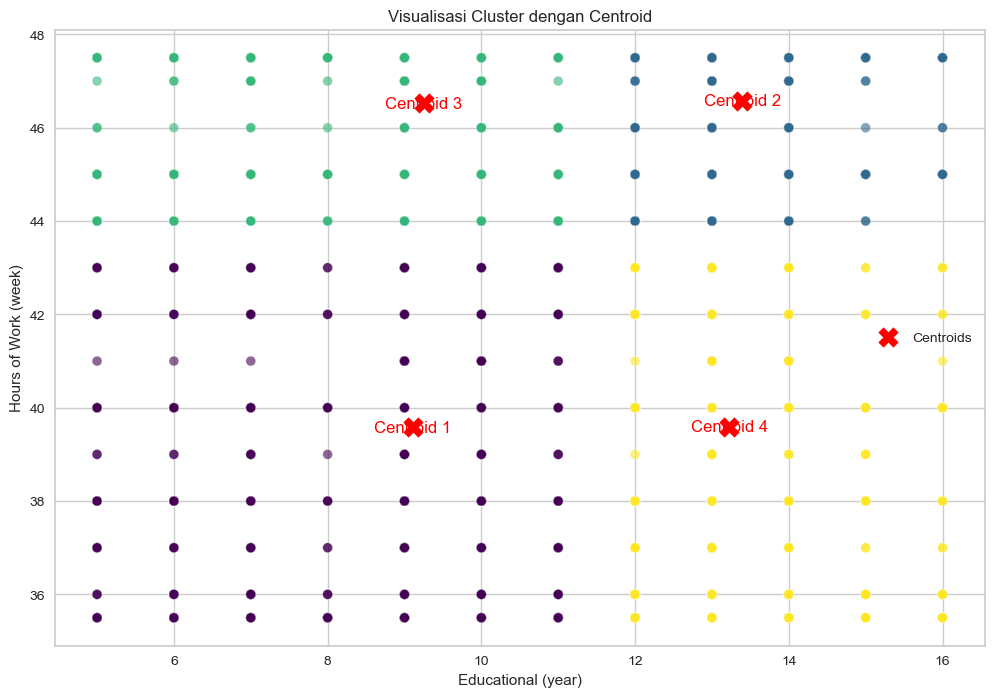

In [572]:
# Melakukan visualisasi 
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster 
plt.figure(figsize=(12, 8))

# Plot data 
plt.scatter(X[:, 0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label 
plt.title('Visualisasi Cluster dengan Centroid') 
plt.xlabel('Educational (year)')
plt.ylabel('Hours of Work (week)')
plt.legend()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

Data baru telah berhasil disimpan!
